# Explore the Data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel("data/Online Retail.xlsx", parse_dates=['InvoiceDate'], converters={"InvoiceNo": str})

In [15]:
df.shape

(541909, 8)

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


* We are only interested in transactions coming from the United Kingdom
* Where the CustomerID is not missing
* Where the Description is not missing
* Where the InvoiceNo does not start with ‘C’ (Look at the data description to see why)
* Quantity greater than 0
* Unit Price greater than 0
* The InvoiceDate is a full year between 11 Dec 2010 to 10 Dec 2011

In [20]:
df_filtered = df[(df['Country'] == "United Kingdom") &
                 (df['CustomerID'].notnull()) &
                 (df['Description'].notnull()) &
                 (~df['InvoiceNo'].str.startswith('C')) &
                 (df['Quantity'] > 0) &
                 (df['UnitPrice'] > 0) &
                 (df['InvoiceDate'] > '2010-12-11') &
                 (df['InvoiceDate'] < '2011-12-10')]

In [22]:
df_filtered.to_csv("data/retail.csv", index=False)

In [23]:
# What is the shape of your data i.e. number of rows and columns?
df_filtered.shape

(339702, 8)

In [30]:
# How many of the columns (or features) are numerical and how many are categorical?
df_filtered.info()
print("Numeric columns: ", df_filtered.select_dtypes(include='number').shape[1])
print("Possible Categorical columns: ", df_filtered.select_dtypes(include='object').shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 339702 entries, 25281 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    339702 non-null  object        
 1   StockCode    339702 non-null  object        
 2   Description  339702 non-null  object        
 3   Quantity     339702 non-null  int64         
 4   InvoiceDate  339702 non-null  datetime64[ns]
 5   UnitPrice    339702 non-null  float64       
 6   CustomerID   339702 non-null  float64       
 7   Country      339702 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.3+ MB
Numeric columns:  3
Possible Categorical columns:  4


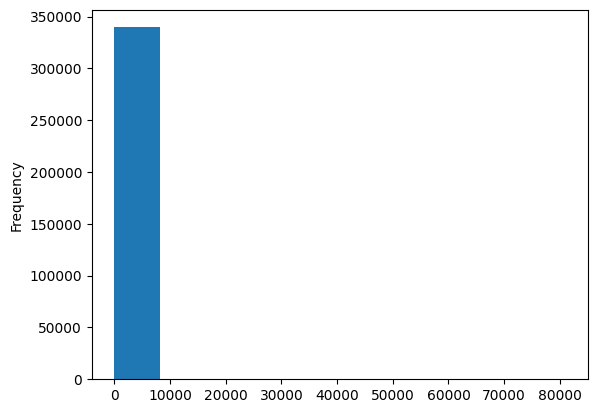

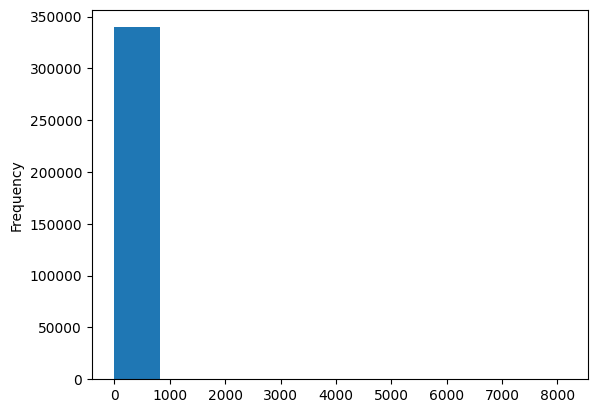

In [35]:
# For the numerical columns, what does the distributions look like?
df_filtered['Quantity'].plot(kind="hist")
plt.show()
df_filtered['UnitPrice'].plot(kind="hist")
plt.show()

In [ ]:
# What is the name of the column to be predicted?
print("None, we are doing unsupervised learning here!")